In [3]:
## Installation requirements:

# !conda create -n myptv -y
# !conda activate myptv
# !pip install git+https://github.com/alexlib/myptv
# !pip install ipympl

In [4]:
from pylab import * # recommended only for short interactive sessions
%matplotlib tk

In [6]:
# plot the target file in 3D
fig = figure(figsize=(10,10))
ax = axes(projection='3d')
targets = loadtxt('./Calibration/target_on_a_side.txt')
ax.plot(targets[:,1], targets[:,3], targets[:,2], 'ro')
for row in targets:
    ax.text(row[1], row[3], row[2],str(int(row[0])) );

FileNotFoundError: ./Calibration/target_on_a_side.txt not found.

In [41]:
# looking at the both plots, decide which points you want to pick
# type here the order of the points you want to click 

points = [5,73,3,72,38,4]

In [56]:
fig,ax = subplots(figsize=(10,10))
ax.imshow(imread('cal/cam1.tif'))
# note that on cam1 we do not see the bottom rows
# text = axcounter = 0.text(0, 0, " Click ", va="bottom", ha="left")
clicks = []

def onclick(event):
    counter = 0
    # tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    # text.set_text(tx)
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))
    ax.text(event.x, event.y, str(points[counter]),bbox=dict(fill=False, edgecolor='red', linewidth=2))
    clicks.append([event.xdata, event.ydata, *targets[points[counter]-1,1:]])
    counter += 1
    # ax.text(event.x, event.y, )
    

cid = fig.canvas.mpl_connect('button_press_event', onclick)


single click: button=1, x=720, y=585, xdata=982.209677, ydata=332.605548
single click: button=1, x=264, y=582, xdata=229.074194, ydata=337.560387
single click: button=1, x=736, y=421, xdata=1008.635484, ydata=603.470065
single click: button=1, x=274, y=414, xdata=245.590323, ydata=615.031355
single click: button=1, x=507, y=417, xdata=630.416129, ydata=610.076516
single click: button=1, x=696, y=520, xdata=942.570968, ydata=439.960387


In [57]:

savetxt('tmp.txt',array(clicks))


NameError: name 'records' is not defined

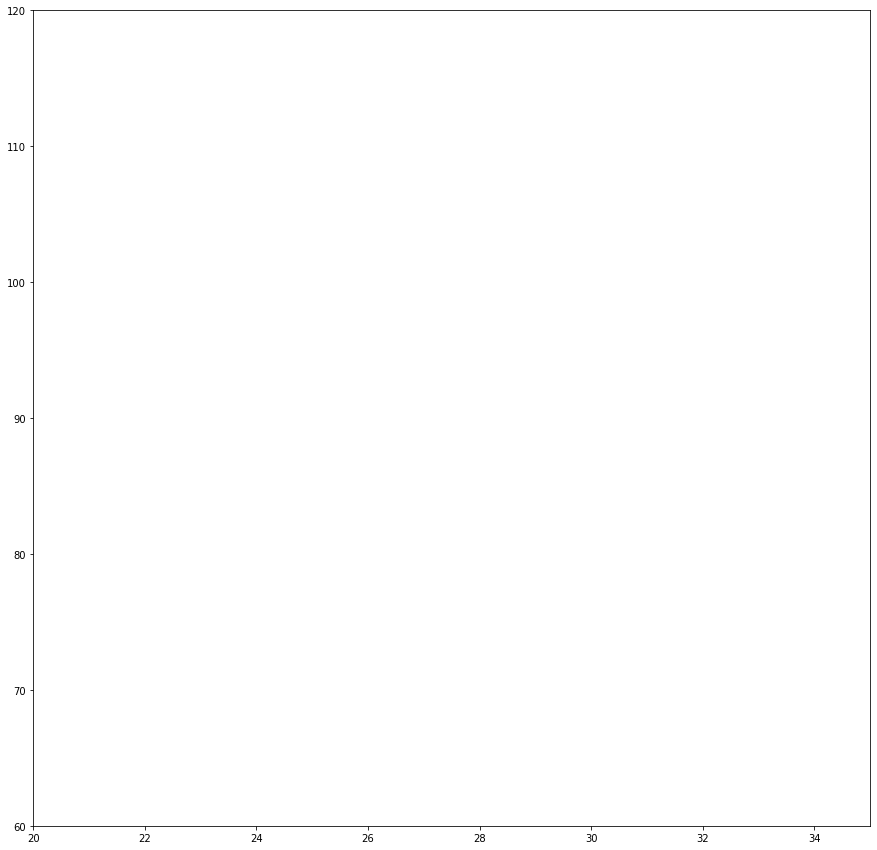

In [2]:
import matplotlib.pyplot as plt
import matplotlib.text as mpl_text
fig = plt.figure(figsize=(15,15))
ax=fig.add_subplot(1,1,1)
ax.set_xlim(20, 35)
ax.set_ylim(60, 120)
for i, record in records.iterrows():
    image = plt.imread('image/' + record.Team + '.png') 
    ax.add_artist( #ax can be added image as artist.
        AnnotationBbox(
            OffsetImage(image)
            , (record.Age, record.Win)
            , frameon=False
        ) 
    )
    ax.add_artist(
        mpl_text.Text(
            x=record.Age
            ,y=record.Win
            ,text=record.Team
            ,color='black'
            ,backgroundcolor='grey'
            ,verticalalignment='center'
            ,horizontalalignment='center'
            ,multialignment=None
            ,fontsize=40
            ,linespacing=None
            ,rotation_mode=None
        )
    )
plt.title('NL West Age/Win Correlation')
plt.show()